일일 확진자 수를 확인할 지역을 입력하세요.:경기


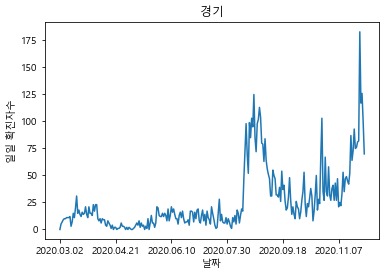

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#지역별 누적 확진자수 데이터
df=pd.read_csv("C:\\Users\\정묵\\Desktop\\2022 1학기\빅데이터언어\\covid.csv",encoding="cp949")

#1.입력 받은 해당 지역 일일 확진자 수 시각화
region=input("일일 확진자 수를 확인할 지역을 입력하세요.:")
match=df[df['지역']==region]
x=[]
y=[0]
#x축 날짜
for i in range(0,274):
    x.append(match.iat[i,0])
#y축 일일 확진자수(당일 확진자수-전일 확진자수)
for i in range(1,274):
    y.append(match.iat[i,2]-match.iat[i-1,2])

#시각화 
plt.rc('font',family='Malgun Gothic')
plt.plot(x,y)
plt.title(region)
plt.xlabel('날짜')
plt.ylabel('일일 확진자수')
plt.xticks(['2020.03.02','2020.04.21','2020.06.10','2020.07.30','2020.09.18','2020.11.07'])
plt.show()

일일 확진자 증감률을 확인할 지역을 입력하세요.:충남


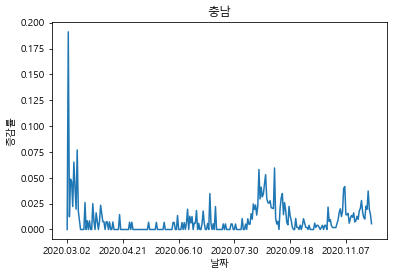

In [58]:
#2.입력 받은 지역의 일일 증감률 시각화
region2=input('일일 확진자 증감률을 확인할 지역을 입력하세요.:')
match2=df[df['지역']==region2]
a=[]
b=[0]
#x축 날짜
for i in range(0,274):
    a.append(match2.iat[i,0])
#y축 일일 증감률((당일 확진자수-전일 확진자수)/전일 확진자수)
for i in range(1,274):
    b.append((match2.iat[i,2]-match2.iat[i-1,2])/match2.iat[i-1,2])
    
#시각화
plt.rc('font',family='Malgun Gothic')
plt.plot(a,b)
plt.title(region2)
plt.xlabel('날짜')
plt.ylabel('증감률')
plt.xticks(['2020.03.02','2020.04.21','2020.06.10','2020.07.30','2020.09.18','2020.11.07'])
plt.show()

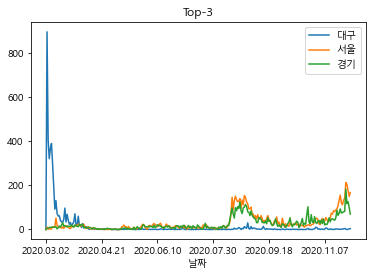

In [62]:
#3.지역 일일 평균 확진자 수가 가장 많은 지역 3곳 시각화(입력 지역 x)
#지역 이름순으로 정렬
df2=df.sort_values(by=[df.columns[1],df.columns[0]])
df2

#각 지역의 일일 평균 확진자 수 구해서 나열
m={}
n=0
for i in range(1,17):
    mean=sum(df2.values[n:n+274,2])/274
    m[df2.iat[n,1]]=mean
    n=i*274
k=sorted(m,key=lambda x : m[x])
k.reverse()

#top3 지역과 그 지역의 확진자 수 매치
top1=df2[df2["지역"]==k[0]]
t1=[0]
for i in range(1,274):
    t1.append(top1.iat[i,2]-top1.iat[i-1,2])
top2=df2[df2["지역"]==k[1]]
t2=[0]
for i in range(1,274):
    t2.append(top2.iat[i,2]-top2.iat[i-1,2])
top3=df2[df2["지역"]==k[2]]
t3=[0]
for i in range(1,274):
    t3.append(top3.iat[i,2]-top3.iat[i-1,2])

z=[]    
for i in range(0,274):
    z.append(top1.iat[i,0])

#시각화
plt.rc('font',family='Malgun Gothic')
plt.plot(z,t1,label=k[0])
plt.plot(z,t2,label=k[1])
plt.plot(z,t3,label=k[2])
plt.title("Top-3")
plt.xlabel('날짜')
plt.xticks(['2020.03.02','2020.04.21','2020.06.10','2020.07.30','2020.09.18','2020.11.07'])
plt.legend()
plt.show()